In [14]:
# Prueba de bonda de ajuste de datos a una distribución normal

from scipy.stats import chi2

fo = [85, 94, 108, 112, 98, 103]
fe = 6*[100]
f = 6*[0]

for i in range(len(fo)):
    f[i] = (fo[i] - fe[i])**2/fe[i]
sum_f = sum(f)
print(sum_f)

# Definición de hipótesis nula
# H0 es que los Pi= 1/6 
# Hipotesis alternativa es Ha Pi != 1/6

# Estadístico de prueba
Xc = sum_f

# Parámetros
alpha = 0.05  # Nivel de significancia (cola derecha)
df = 6       # Grados de libertad

# Obtener la región crítica de la distribución chi-cuadrado
chi2_critical = chi2.ppf(1 - alpha, df-1)
print(chi2_critical)
print(Xc>chi2_critical)

# Mismo ejercio pero con VP
VP = 1- chi2.cdf(Xc, df-1)
print(VP)
print(VP <= alpha)

4.819999999999999
11.070497693516351
False
0.4382404183728038
False


## Ejemplo 2

In [18]:
fo = [11, 11, 9, 8, 8, 11, 9, 11, 13, 9]
fe = 10*[10]
f = 10*[0]

for i in range(len(fo)):
    f[i] = (fo[i] - fe[i])**2/fe[i]
sum_f = sum(f)
print(sum_f)

# Definición de hipótesis nula
# H0 es que los Pi= 1/10 
# Hipotesis alternativa es Ha Pi != 1/10

# Estadístico de prueba
Xc = sum_f

# Parámetros
alpha = 0.01  # Nivel de significancia (cola derecha)
df = 10    # Grados de libertad

# Obtener la región crítica de la distribución chi-cuadrado
chi2_critical = chi2.ppf(1 - alpha, df-1)
print(chi2_critical)
print(Xc>chi2_critical)

# Mismo ejercio pero con VP

VP = 1- chi2.cdf(Xc, df-1)
print(VP)
print(VP <= alpha)

2.4000000000000004
21.665994333461924
False
0.9834529512295069
False


## Ejemplo 3

In [29]:
# Hipótesis nula es Ho = X~Bin(n, p)
# Hipótesis alternativa es Ha = X~Bin(n, p') con p!=p'

from scipy.stats import binom

fo = [39, 23, 13]
fe = [38.25, 26.25, 10.5]
f = 3*[0]

for i in range(len(fo)):
    f[i] = (fo[i] - fe[i])**2/fe[i]
sum_f = sum(f)
print(sum_f)

# Definición de hipótesis nula
# H0 es que los Pi= 1/10 
# Hipotesis alternativa es Ha Pi != 1/10

# Estadístico de prueba
Xc = sum_f

# Parámetros
alpha = 0.05  # Nivel de significancia (cola derecha)
df = 3    # Grados de libertad
r = 1  # Número de parámetros estimados

# Obtener la región crítica de la distribución chi-cuadrado
chi2_critical = chi2.ppf(1 - alpha, df-1-r)
print(chi2_critical)
print(Xc>chi2_critical)

# Mismo ejercio pero con VP

VP = 1- chi2.cdf(Xc, df-1-r)
print(VP)
print(VP <= alpha)

1.0123249299719888
3.841458820694124
False
0.3143465013290474
False


## Ejemplo 7.7.3

In [51]:
import statistics
datos = [30, 40, 42, 52, 55, 60, 60, 62, 64, 65, 66, 66, 67, 67, 68, 68, 68, 70, 70, 70, 71, 72, 72, 73, 74, 74, 75, 76, 76, 78, 78, 78, 79, 80, 80, 82, 83, 84, 84, 85, 86, 88, 90, 90, 92, 93, 93, 94, 95, 97]
preguntas = 100
estudiantes = 50

media = sum(datos)/len(datos)
varianza = sum([(x-media)**2 for x in datos])/len(datos)

datos1 = ([x for x in datos if x < 60])
datos11 = len(datos1)
print(datos1)
datos2 = len([x for x in datos if x >= 60 and x < 70])
print(datos2)

datos3 = len([x for x in datos if x >= 70 and x < 80])
print(datos3)

datos4 = len([x for x in datos if x >= 80 and x < 90])
print(datos4)

datos5 = len([x for x in datos if x >= 90])
print(datos5)



[30, 40, 42, 52, 55]
12
16
9
8
[np.float64(8.034690221294994e-39), np.float64(1.2052035331942461e-36), np.float64(8.948636233967278e-35), np.float64(4.3848317546439836e-33), np.float64(1.5949825507517407e-31)]


In [32]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(datos)

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis (data is normally distributed)")
else:
    print("Reject the null hypothesis (data is not normally distributed)")

Shapiro-Wilk Test Statistic: 0.9496979452650944
P-Value: 0.035907513945758834
Reject the null hypothesis (data is not normally distributed)


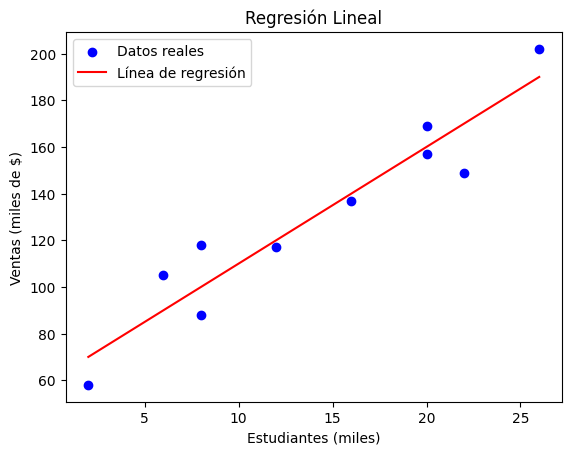

Coeficiente de regresión: 5.0
Intersección: 60.0


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos
estudiantes_miles = np.array([2, 6, 8, 8, 12, 16, 20, 20, 22, 26]).reshape(-1, 1)
ventas_miles_de_dolares = np.array([58, 105, 88, 118, 117, 137, 157, 169, 149, 202])

# Crear el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(estudiantes_miles, ventas_miles_de_dolares)

# Predicciones
ventas_predichas = modelo.predict(estudiantes_miles)

# Visualización
plt.scatter(estudiantes_miles, ventas_miles_de_dolares, color='blue', label='Datos reales')
plt.plot(estudiantes_miles, ventas_predichas, color='red', label='Línea de regresión')
plt.xlabel('Estudiantes (miles)')
plt.ylabel('Ventas (miles de $)')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

# Coeficientes
print(f'Coeficiente de regresión: {modelo.coef_[0]}')
print(f'Intersección: {modelo.intercept_}')


In [58]:
# Calcular la correlación entre estudiantes_miles y ventas_miles_de_dolares
correlacion = np.corrcoef(estudiantes_miles.flatten(), ventas_miles_de_dolares)[0, 1]
print(f'Correlación: {correlacion}')

Correlación: 0.9501229552044079


In [60]:
# Calcular el coeficiente de determinación (R²)
r_squared = modelo.score(estudiantes_miles, ventas_miles_de_dolares)
print(f'Coeficiente de determinación (R²): {r_squared}')

Coeficiente de determinación (R²): 0.9027336300063573


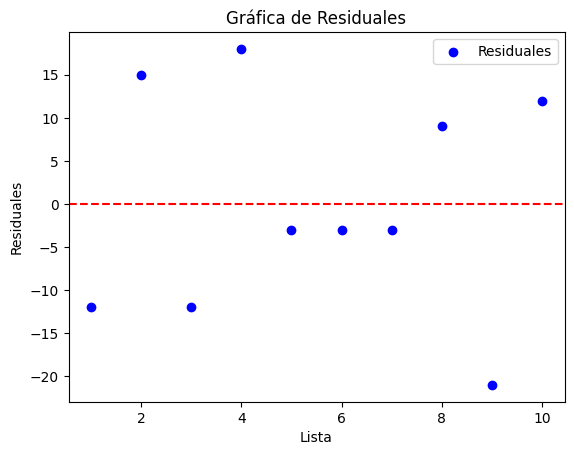

Residuales: [-12.  15. -12.  18.  -3.  -3.  -3.   9. -21.  12.]


In [63]:
# Calcular los residuales
lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
residuales = ventas_miles_de_dolares - ventas_predichas

# Graficar los residuales
plt.scatter(lista, residuales, color='blue', label='Residuales')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Lista')
plt.ylabel('Residuales')
plt.title('Gráfica de Residuales')
plt.legend()
plt.show()

# Mostrar los residuales
print(f'Residuales: {residuales}')


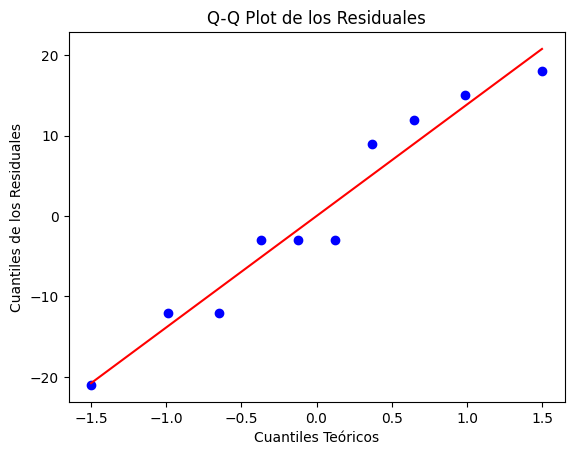

In [64]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Crear el gráfico Q-Q
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Q-Q Plot de los Residuales')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuales')
plt.show()

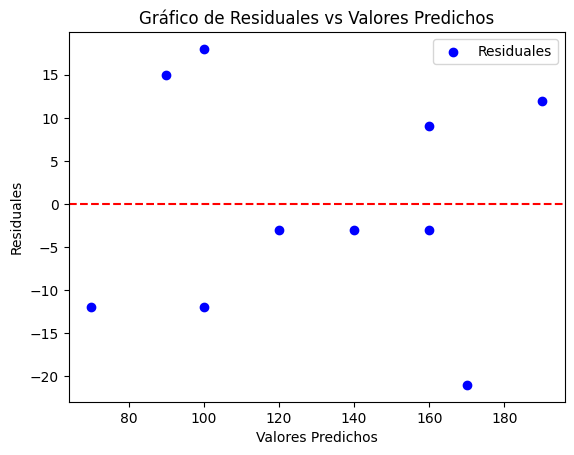

Varianza de los Residuales: 153.0


In [65]:
# Graficar los residuales frente a los valores predichos
plt.scatter(ventas_predichas, residuales, color='blue', label='Residuales')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs Valores Predichos')
plt.legend()
plt.show()

# Calcular la varianza de los residuales
varianza_residuales = np.var(residuales)
print(f'Varianza de los Residuales: {varianza_residuales}')